Instalamos **TIGRE** (Este bloque de código siempre debe de ir primero, en especial cuando se use junto con Astra).

In [2]:
!git clone https://github.com/CERN/TIGRE.git
%cd TIGRE/Python
!python setup.py install
!python example.py

fatal: destination path 'TIGRE' already exists and is not an empty directory.
/content/TIGRE/Python
Traceback (most recent call last):
  File "/content/TIGRE/Python/setup.py", line 11, in <module>
    from Cython.Distutils import build_ext
ModuleNotFoundError: No module named 'Cython'
Traceback (most recent call last):
  File "/content/TIGRE/Python/example.py", line 5, in <module>
    import tigre
  File "/content/TIGRE/Python/tigre/__init__.py", line 23, in <module>
    from .utilities.Ax import Ax
  File "/content/TIGRE/Python/tigre/utilities/Ax.py", line 4, in <module>
    from _Ax import _Ax_ext
ModuleNotFoundError: No module named '_Ax'


Verificamos con qué versión de python estamos trabajando.

In [3]:
!python --version

Python 3.10.13


Instalamos conda para google colab.

Cuando se ejecute el bloque que tiene el código `condacolab.install()` se reiniciará el kernel del notebook, por lo que debemos de volver a ejecutar los 3 siguientes bloques de código para verificar si todo se instaló de forma adecuada.

In [4]:
!pip install -q condacolab

In [5]:
import condacolab

In [6]:
condacolab.install()

✨🍰✨ Everything looks OK!


Instalamos las bibliotecas necesarias para que nuestro script funcione.

In [5]:
!mamba install -c conda-forge -c intel -c ccpi cil=23.0.1 astra-toolbox ccpi-regulariser "ipywidgets<8"
!cp -r /usr/local/lib/python3.10/site-packages/astra_toolbox-2.0.0-py3.10-linux-x86_64.egg/astra /usr/local/lib/python3.10/site-packages/


Looking for: ['cil=23.0.1', 'astra-toolbox', 'ccpi-regulariser', "ipywidgets[version='<8']"]

[+] 0.0s
[+] 0.1s
intel/linux-64 (ch..  ⣾  [+] 0.2s
intel/linux-64 (ch..  ⣾  [+] 0.3s
intel/linux-64 (ch..  ⣾  [+] 0.4s
intel/linux-64 (ch..  ⣾  [+] 0.5s
intel/linux-64 (ch..  ⣾  intel/linux-64 (check zst)                        
[+] 0.0s
intel/noarch (chec..  ⣾  [+] 0.1s
intel/noarch (chec..  ⣾  [+] 0.2s
intel/noarch (chec..  ⣾  [+] 0.3s
intel/noarch (chec..  ⣾  intel/noarch (check zst)                          
[+] 0.0s
ccpi/linux-64 (che..  ⣾  [+] 0.1s
ccpi/linux-64 (che..  ⣾  [+] 0.2s
ccpi/linux-64 (che..  ⣾  ccpi/linux-64 (check zst)                         
[+] 0.0s
[+] 0.1s
ccpi/noarch (check..  ⣾  [+] 0.2s
ccpi/noarch (check..  ⣾  ccpi/noarch (check zst)                           
[+] 0.0s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.1s
conda-forge/linux-64   1%
conda-forge/noarch    ⣾  
intel/linux-64        ⣾  
intel/noarch          ⣾  
ccpi/linux-64         ⣾  [+] 0.2s


Adicionalmente instalamos tomophantom (Esta no es necesaria, pero en caso de requerirla se debe de ejecutar).

In [6]:
!conda install -c httomo tomophantom

Channels:
 - httomo
 - conda-forge
 - ccpi
 - intel
Platform: linux-64
Solving environment: - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - tomophantom


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tomophantom-2.0.0          |     np123py310_0         197 KB  ccpi
    ------------------------------------------------------------
                                           Total:         197 KB

The following NEW packages will be INSTALLED:

  tomophantom        ccpi/linux-64::tomophantom-2.0.0-np123py310_0 



                                                                        
Preparing transaction: \ 

Importamos lo necesario para el Script.

In [1]:
import os
from cil.io import NikonDataReader
from cil.processors import TransmissionAbsorptionConverter, Slicer, CentreOfRotationCorrector, Binner
from cil.recon import FDK
from cil.utilities.display import show2D, show_geometry
from cil.plugins.tigre import ProjectionOperator, FBP
from cil.utilities.jupyter import islicer

Guardamos la ruta donde se encuentra nuestro archivo `xteckt` del tomografo Nikon.

In [2]:
filename = "/content/drive/Shareddrives/Servicio Social ICAT-UNAM 2023/Cilindro/Imagenes/CS180.xtekct"

In [3]:
import logging
logging.basicConfig(level=logging.WARNING)
cil_log_level = logging.getLogger('cil.processors')
cil_log_level.setLevel(logging.INFO)

Para que se puedan leer los datos de entrada, el archivo `xteckt` debe de estar en la misma carpeta que las proyecciones. Para este caso está en la misma carpeta que las 180 imagenes .Tif del cilindro.

In [4]:
data_in = NikonDataReader(file_name=filename).read()

In [5]:
print(data_in)

Number of dimensions: 3
Shape: (180, 1012, 1014)
Axis labels: ('angle', 'vertical', 'horizontal')



In [6]:
# print the geometry data associated with the data
print(data_in.geometry)

3D Cone-beam tomography
System configuration:
	Source position: [  0.    , -87.9998,   0.    ]
	Rotation axis position: [-0.,  0.,  0.]
	Rotation axis direction: [0., 0., 1.]
	Detector position: [  -0.    , 1019.0002,    0.    ]
	Detector direction x: [1., 0., 0.]
	Detector direction y: [0., 0., 1.]
Panel configuration:
	Number of pixels: [1014 1012]
	Pixel size: [0.1 0.1]
	Pixel origin: top-right
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 180
	Angles 0-20 in degrees:
[174.20728, 172.20728, 170.20726, 168.20724, 166.20723, 164.20721,
 162.2072 , 160.20718, 158.20718, 156.20717, 154.20715, 152.20714,
 150.20712, 148.2071 , 146.20709, 144.20709, 142.20708, 140.20706,
 138.20705, 136.20703]
Distances in units: units distance


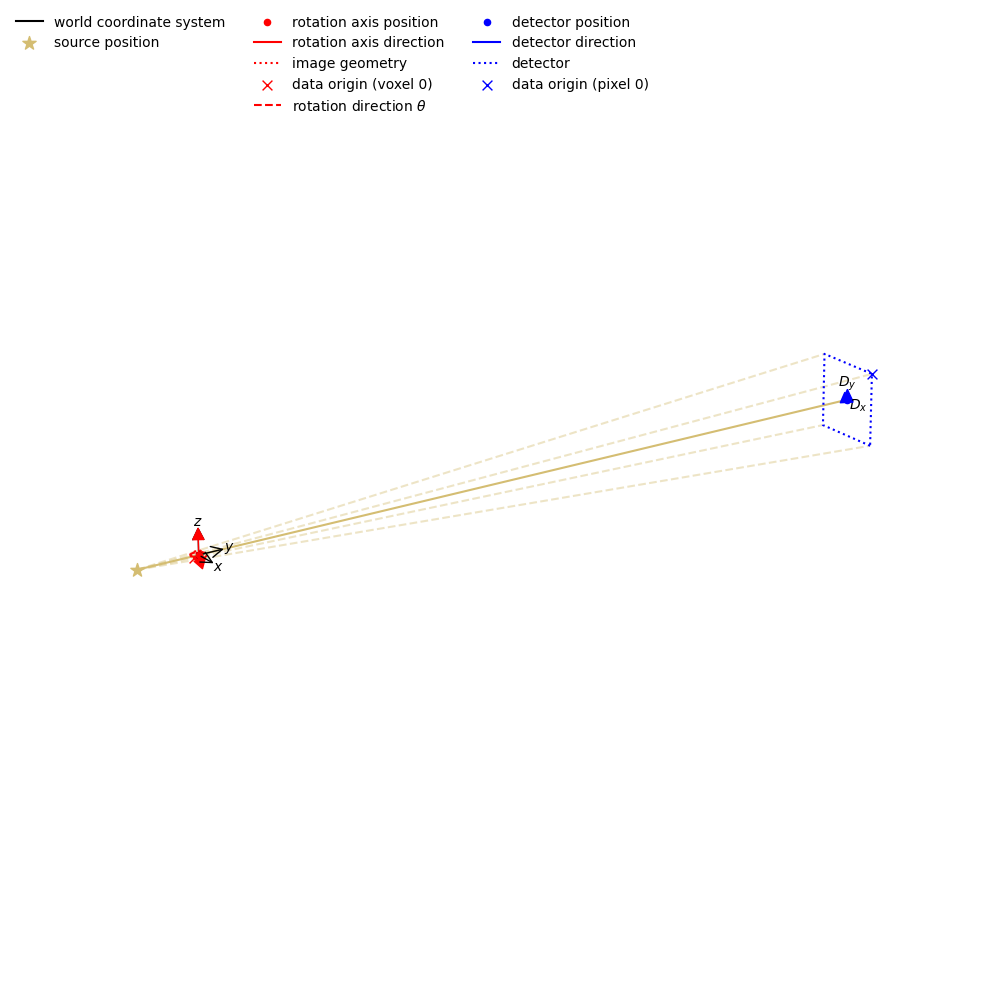

In [7]:
# display the geometry
show_geometry(data_in.geometry)

In [8]:
islicer(data_in, direction='angle',size=10, origin='upper')

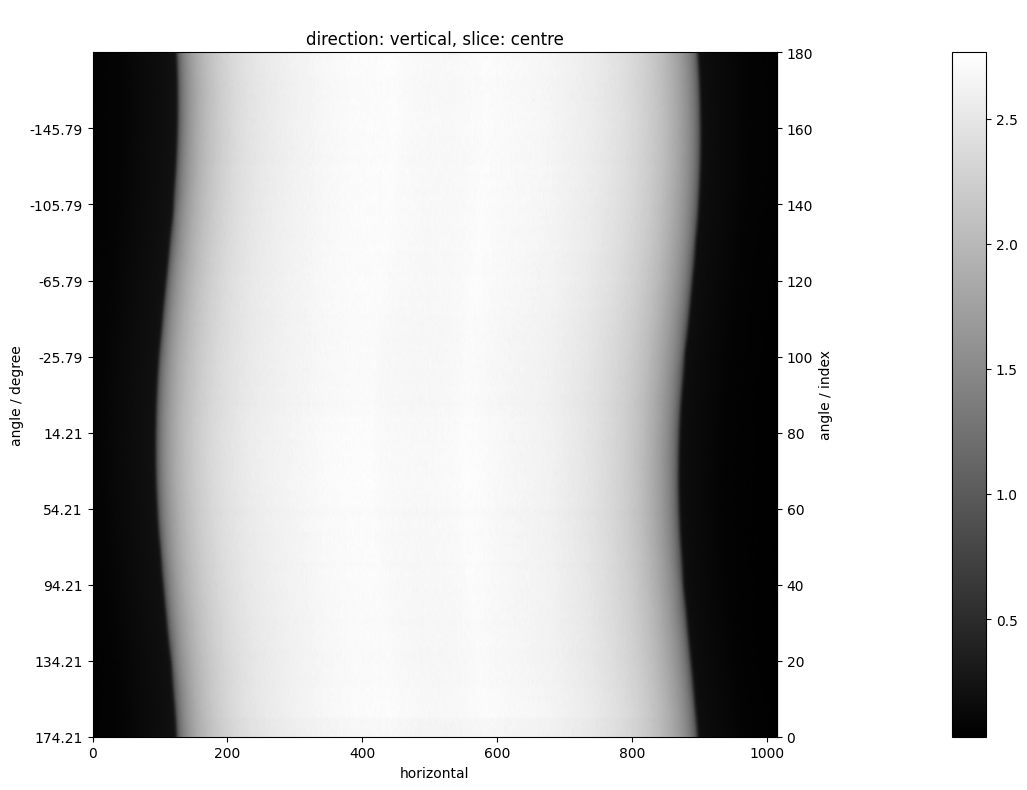

In [9]:
# calculate the absorption data using the Beer–Lambert law
data_absorption = TransmissionAbsorptionConverter()(data_in)

# show the centre slice using show2D
show2D(data_absorption, slice_list=('vertical', 'centre'))

In [ ]:
# reorder the data for the `tigre` backend
data_absorption.reorder(order='tigre')

# create a default image geometry to define the reconstruction volume
ig = data_absorption.geometry.get_ImageGeometry()

# create the FDK reconstructor
fdk =  FDK(data_absorption, ig)

# run the reconstructor
recon = fdk.run()


FDK recon

Input Data:
	angle: 180
	vertical: 1012
	horizontal: 1014

Reconstruction Volume:
	vertical: 1012
	horizontal_y: 1014
	horizontal_x: 1014

Reconstruction Options:
	Backend: tigre
	Filter: ram-lak
	Filter cut-off frequency: 1.0
	FFT order: 11
	Filter_inplace: False

